# Case Study: Self Organizing Maps In Fraud Detection

<img src="https://github.com/ijoseff/ijoseff.github.io/blob/master/assets/img/portfolio/som.png?raw=true" width="500" height="250" />

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-Study:-Self-Organizing-Maps-In-Fraud-Detection" data-toc-modified-id="Case-Study:-Self-Organizing-Maps-In-Fraud-Detection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case Study: Self Organizing Maps In Fraud Detection</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Review" data-toc-modified-id="Review-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Review</a></span></li><li><span><a href="#Import-Libraries-and-Data" data-toc-modified-id="Import-Libraries-and-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Import Libraries and Data</a></span></li><li><span><a href="#Create-Self-Organizing-Maps" data-toc-modified-id="Create-Self-Organizing-Maps-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Create Self-Organizing Maps</a></span><ul class="toc-item"><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Model Training</a></span></li><li><span><a href="#ModelVisualization" data-toc-modified-id="ModelVisualization-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>ModelVisualization</a></span></li></ul></li><li><span><a href="#Create-Artificial-Neural-Network" data-toc-modified-id="Create-Artificial-Neural-Network-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Create Artificial Neural Network</a></span><ul class="toc-item"><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Create-Model-Architecture" data-toc-modified-id="Create-Model-Architecture-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Create Model Architecture</a></span></li><li><span><a href="#Making-Predictions-And-Evaluating-The-Model" data-toc-modified-id="Making-Predictions-And-Evaluating-The-Model-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Making Predictions And Evaluating The Model</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

Self-Organizing Map or self-organizing feature map (SOFM) algorithm to create a model of typical cardholder's behavior and to analyze the deviation of transactions, thus finding suspicious transactions. This a type of artificial neural network (ANN) that is trained using unsupervised learning. 

**Problem:**
 - Create self organizing map and then implement artificial neural network to find fraudulent cases

**Dataset:**
 - The dataset contains 16 anonymized variables, 1 “amount” variable, 1 “time” variable, and 1 target variable — Class. The variables are anonymized to protect the privacy of the customers as the dataset is in the public domain. The dataset can be found here. ‘0’ as target variable corresponds to the non-fraudulent cases whereas ‘1’ in target variable corresponds to fraudulent cases.

**Source:** https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

# Review

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/Somtraining.svg/800px-Somtraining.svg.png" />

An illustration of the training of a self-organizing map. The blue blob is the distribution of the training data, and the small white disc is the current training datum drawn from that distribution. At first (left) the SOM nodes are arbitrarily positioned in the data space. The node (highlighted in yellow) which is nearest to the training datum is selected. It is moved towards the training datum, as (to a lesser extent) are its neighbors on the grid. After many iterations the grid tends to approximate the data distribution (right).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/35/TrainSOM.gif/220px-TrainSOM.gif" />

Like most artificial neural networks, SOMs operate in two modes: training and mapping. "Training" builds the map using input examples (a competitive process, also called vector quantization), while "mapping" automatically classifies a new input vector.

# Import Libraries and Data

In [37]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')

# Check dataset
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


# Create Self-Organizing Maps

## Data Preprocessing

In [39]:
# Label the array values of independent and dependent variables.
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [69]:
# Check dimension
X.shape, y.shape

((690, 15), (690,))

In [40]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

## Model Training

In [41]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5) #Sigma = radius
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

## ModelVisualization

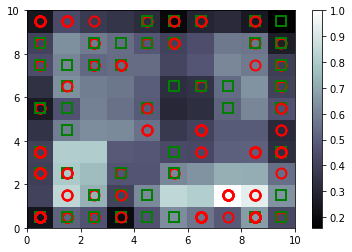

In [42]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

# Create Artificial Neural Network

## Data Preprocessing

In [51]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(7,1)], mappings[(9,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [70]:
# Creating the matrix features
customers = dataset.iloc[:, 1:].values

In [71]:
# Creating the dependable variable
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_frauds[i] = 1

In [72]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [73]:
# Check dimension
customers.shape, is_fraud.shape

((690, 15), (690,))

## Create Model Architecture

In [74]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)

Epoch 1/2
690/690 [==============================] - 1s 1ms/step - loss: 0.4433 - accuracy: 1.0000
Epoch 2/2
690/690 [==============================] - 1s 1ms/step - loss: 0.0933 - accuracy: 1.0000


## Making Predictions And Evaluating The Model

In [80]:
# Predicting the Test set results
y_pred = classifier.predict(customers)

In [81]:
# concatenate customerID with the probability values
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred 

array([[1.57761560e+07, 4.54278290e-02],
       [1.57395480e+07, 3.25773954e-02],
       [1.56628540e+07, 5.87960482e-02],
       ...,
       [1.56754500e+07, 2.30326653e-02],
       [1.57764940e+07, 1.19131533e-02],
       [1.55924120e+07, 6.10088110e-02]])

In [82]:
# Sort the customer ID according probabilities of being fraud # Lowest to highest
y_pred  = y_pred[y_pred[:, 1].argsort()]

In [94]:
# First column is the customerID and the last column is the probabilities of being a fraud # From lowest to highest
y_pred

array([[1.57997850e+07, 2.55444646e-03],
       [1.56548590e+07, 4.91350889e-03],
       [1.55858550e+07, 6.42305613e-03],
       ...,
       [1.57355720e+07, 1.11779273e-01],
       [1.57101380e+07, 1.42052442e-01],
       [1.55941330e+07, 1.44720882e-01]])

# Conclusion

The bank should investigate the file of this customer and cross check if this customer is indeed a fraud or not.